In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose



In [3]:
import xlrd
import openpyxl

In [4]:
data = 'CocaCola_Sales_Rawdata.xlsx'
df= pd.read_excel(data)

In [5]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
df. columns

Index(['Quarter', 'Sales'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_

In [8]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [10]:
df.shape

(42, 2)

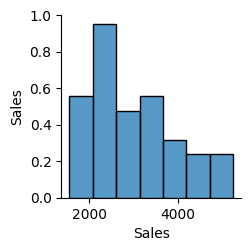

In [11]:
sns.pairplot(data =df)
plt.show()

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

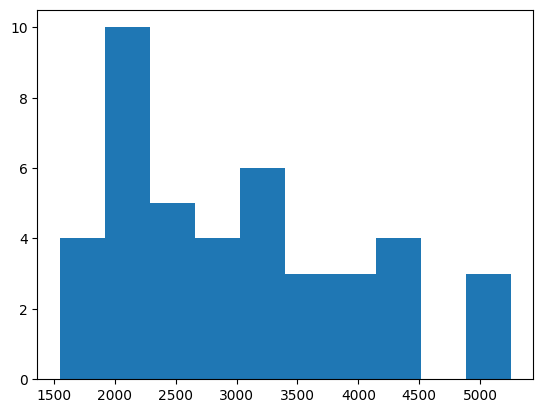

In [12]:
plt.hist(x= 'Sales', data=df)

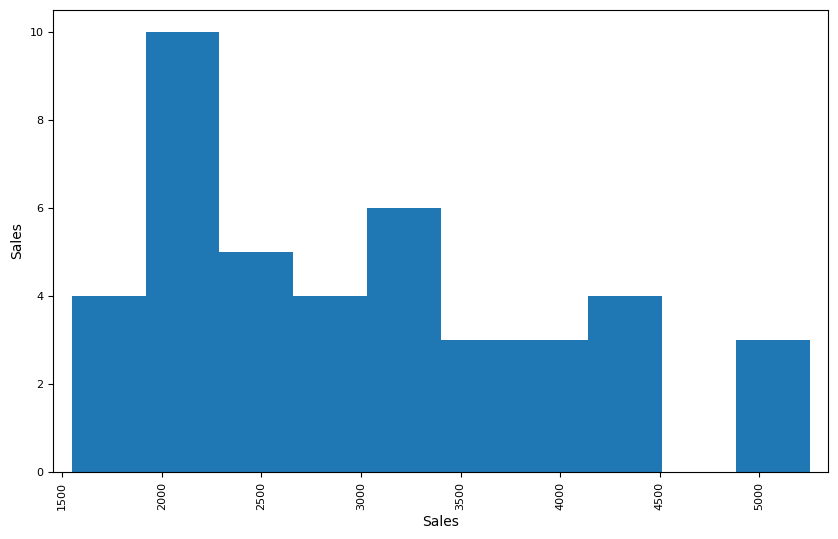

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

<Axes: >

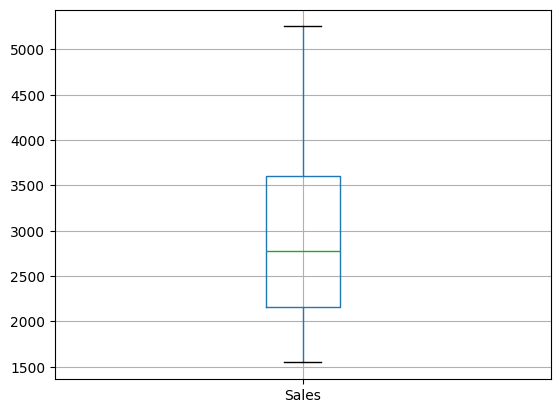

In [14]:
df.boxplot('Sales')

no outliers are present in the data

In [15]:
quarters= ['Q1','Q2','Q3','Q4']
df1= df['Quarter'][0]
df1[0:2]

'Q1'

In [16]:
df['quarter']= 0
for i in range(42):
    n= df['Quarter'][i]
    df['quarter'][i]= n[0:2]

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\3640134996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]= n[0:2]
C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\3640134996.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Q1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['quarter'][i]= n[0:2]


In [18]:
df2= pd.get_dummies(df['quarter'])
df2

,Q1,Q2,Q3,Q4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True
8,True,False,False,False
9,False,True,False,False


In [24]:
df3=pd.concat([df,df2],axis=1)
df3

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,True,False,False,False
1,Q2_86,2244.960999,Q2,False,True,False,False
2,Q3_86,2533.804993,Q3,False,False,True,False
3,Q4_86,2154.962997,Q4,False,False,False,True
4,Q1_87,1547.818996,Q1,True,False,False,False
5,Q2_87,2104.411995,Q2,False,True,False,False
6,Q3_87,2014.362999,Q3,False,False,True,False
7,Q4_87,1991.746998,Q4,False,False,False,True
8,Q1_88,1869.049999,Q1,True,False,False,False
9,Q2_88,2313.631996,Q2,False,True,False,False


In [30]:
df3["t"]= np.arange(1,43)
df3["t_squared"] = df3["t"]*df3["t"]
df3.columns
df3["log_Sales"]= np.log(df3["Sales"])
df3

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


Text(0.5, 1.0, 'lag plot')

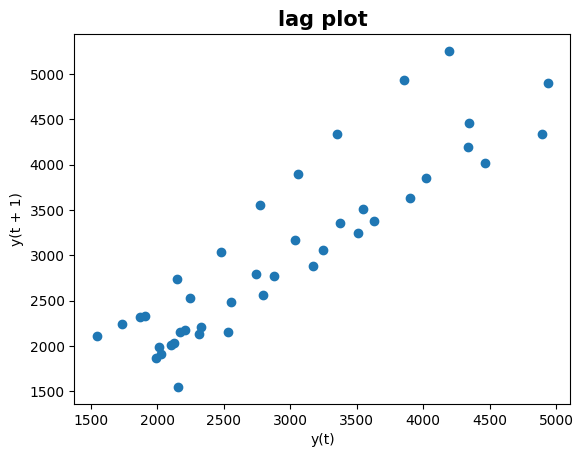

In [31]:
from pandas.plotting import lag_plot
lag_plot(df3['Sales'])
plt.title('lag plot',size = 15, weight = 'bold')

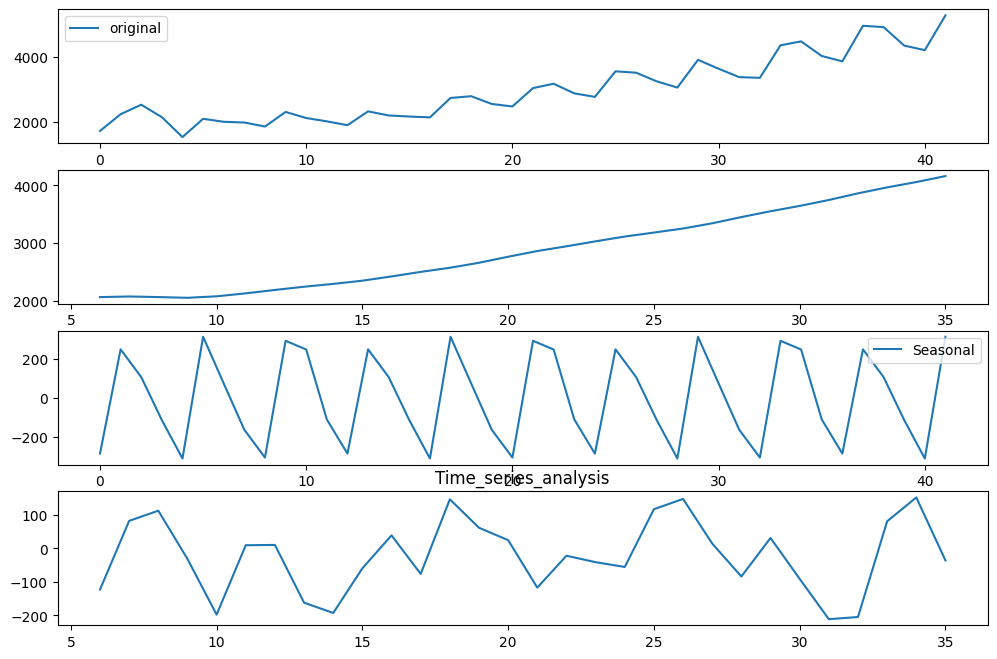

In [34]:
decomposition= seasonal_decompose(df3['Sales'],model='additive',period=12)
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(df3['Sales'],label='original')
plt.legend()
plt.subplot(4,1,2)
plt.plot(decomposition.trend,label='Trend')
plt.subplot(4,1,3)
plt.plot(decomposition.seasonal,label='Seasonal')
plt.legend()
plt.subplot(4,1,4)
plt.plot(decomposition.resid,label='Residual')
plt.title('Time_series_analysis')
plt.show()

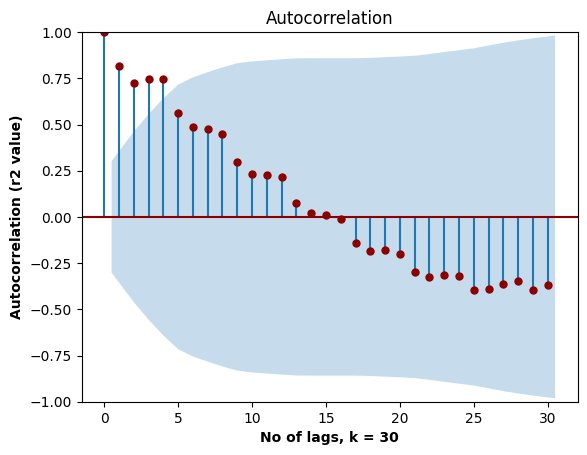

In [35]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df3['Sales'], lags = 30, color = 'darkred')                                             
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 10, weight = 'bold')
plt.show()

In [36]:
train=df3.head(37)
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602


In [37]:
test=df3.tail(4)
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
model = ARIMA(train['Sales'])
model_fit = model.fit()

# Forecasting
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluation
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print(f"RMSE: {rmse}")

RMSE: 2660.0342524905477


c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [45]:
import statsmodels.formula.api as smf

linear = smf.ols('Sales~t',data = train).fit()
pred_linear = pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_linear))**2))
rmse_linear

4387.941602291166

In [46]:
# quadratic model

Quad = smf.ols('Sales~t + t_squared',data = train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_Quad))**2))
print('Root mean square error:',rmse_Quad)

Root mean square error: 296250.19718653295


In [47]:
# Additive seasonality model

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  2543.7937002527606


In [48]:
# multiplicative seasonality model
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  2544.462679610579


In [49]:
# Multiplicative additive seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])- np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  3949.54283226568


In [52]:
final_data = {'Model':pd.Series(['rmse_linear','rmse_Quad','rmse_add_sea','rmse_Mult_sea','rmse_Mult_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_add_sea,rmse_Mult_sea,rmse_Mult_add_sea])}

In [54]:
final_data

{'Model': 0          rmse_linear
 1            rmse_Quad
 2         rmse_add_sea
 3        rmse_Mult_sea
 4    rmse_Mult_add_sea
 dtype: object,
 'RMSE_Values': 0      4387.941602
 1    296250.197187
 2      2543.793700
 3      2544.462680
 4      3949.542832
 dtype: float64}

In [55]:
Final_pred = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = df3).fit()
Final_pred

In [57]:
pred_new = pd.Series(Final_pred.predict(df3))
pred_new

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64

# Q2

In [59]:
data='Airlines+Data.xlsx'
df4=pd.read_excel(data)
df4.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [60]:
df4.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [61]:
df4.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [62]:
df4.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [63]:
df4.value_counts()

Month       Passengers
1995-01-01  112           1
1995-02-01  118           1
2000-11-01  203           1
2000-10-01  229           1
2000-09-01  259           1
                         ..
1997-06-01  178           1
1997-05-01  172           1
1997-04-01  163           1
1997-03-01  178           1
2002-12-01  306           1
Name: count, Length: 96, dtype: int64

In [64]:
df4.shape

(96, 2)

In [65]:
df4.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [66]:
df4.tail

<bound method NDFrame.tail of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [67]:
df4['Month'] = pd.to_datetime(df4['Month'],infer_datetime_format = True)
indexed_df4 = df4.set_index(['Month'])

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\2573970937.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['Month'] = pd.to_datetime(df4['Month'],infer_datetime_format = True)


In [69]:
from datetime import datetime
indexed_df4.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


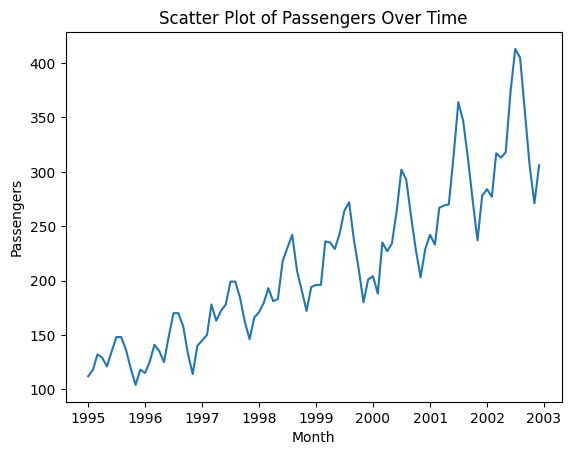

In [70]:
plt.plot(df4['Month'], df4['Passengers'])
plt.title('Scatter Plot of Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [71]:
rolmean = indexed_df4.rolling(window = 12).mean()
rolstd = indexed_df4.rolling(window = 12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean /std')

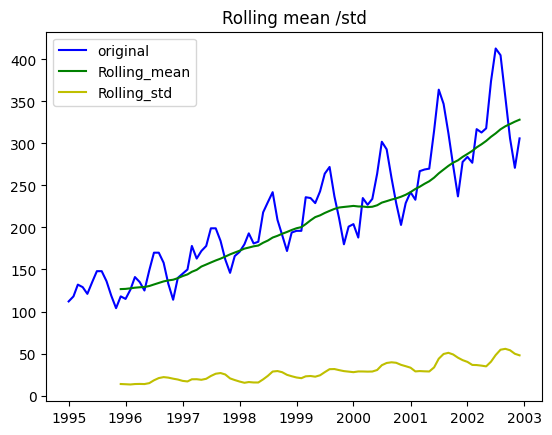

In [72]:
orig = plt.plot(indexed_df4,color = 'blue',label = 'original')
mean = plt.plot(rolmean,color = 'g',label = 'Rolling_mean')
std = plt.plot(rolstd,color = 'y',label = 'Rolling_std')
plt.legend()
plt.title('Rolling mean /std')

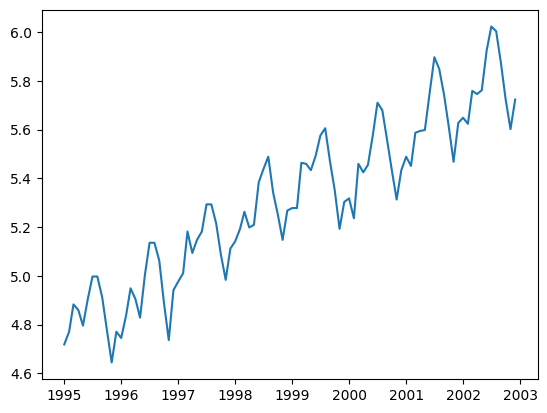

In [73]:
indexed_df4_logscale = np.log(indexed_df4)
plt.plot(indexed_df4_logscale)

        Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
5  1995-06-01         135
6  1995-07-01         148
7  1995-08-01         148
8  1995-09-01         136
9  1995-10-01         119
10 1995-11-01         104
11 1995-12-01         118
12 1996-01-01         115
13 1996-02-01         126
14 1996-03-01         141


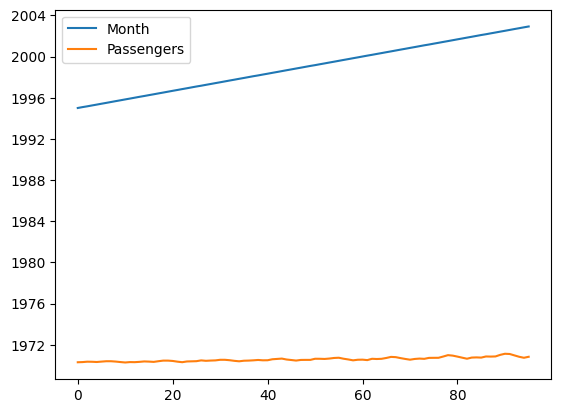

In [74]:
interpolated = df4.interpolate(method='linear') 
print(interpolated.head(15))
interpolated.plot()
plt.show()

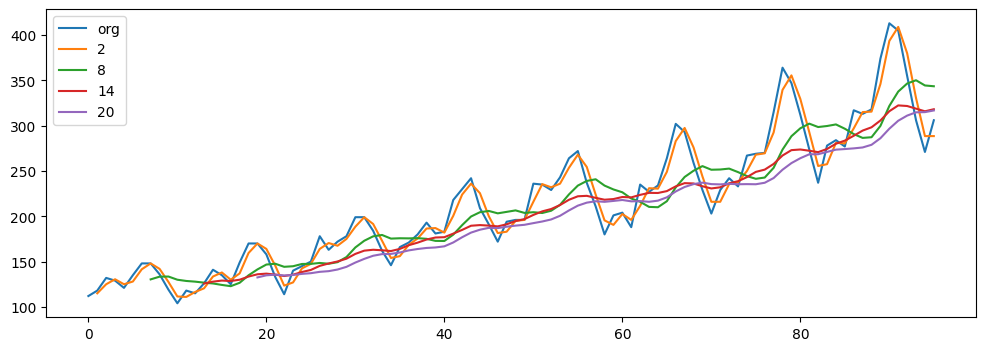

In [75]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

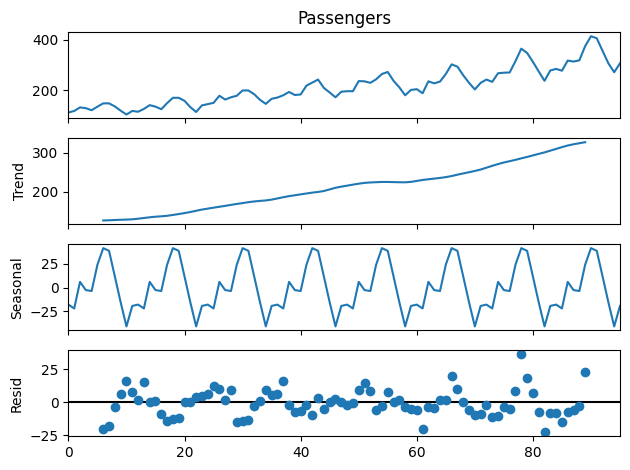

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'interpolated' is your DataFrame with a DateTime index
decompose_ts_add = seasonal_decompose(interpolated['Passengers'], period=12)  
decompose_ts_add.plot()
plt.show()


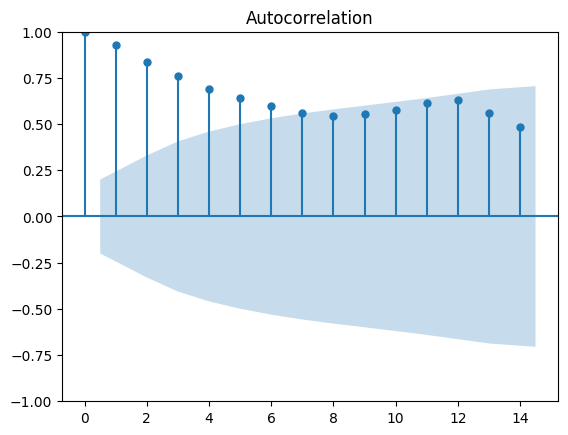

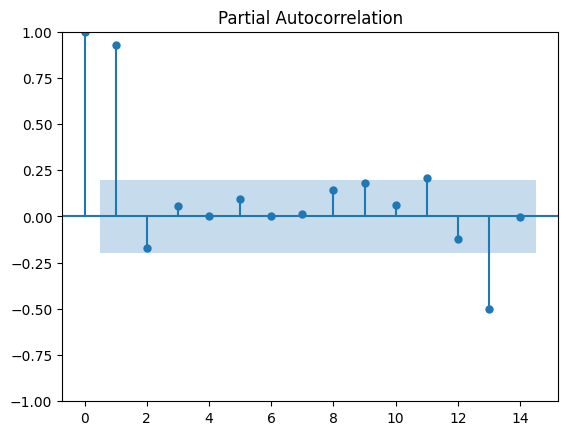

In [77]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()


In [79]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

In [81]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [82]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Assuming Train and Test are your training and testing sets
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_ses,Test.Passengers)


c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.894852606792627

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\2790494711.py:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


15.722798256076471

In [85]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\2242916697.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


3.5048104545232412

In [86]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\3855094368.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


3.5048104545232412

In [87]:
import math
from sklearn.metrics import mean_squared_error

rmse_hwe_mul_add = math.sqrt(mean_squared_error(pred_hwe_mul_add, Test['Passengers']))
rmse_hwe_mul_add

14.13220011068456

In [91]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
hwe_model_add_add.forecast()

96    319.23527
dtype: float64

In [92]:
interpolated.reset_index(inplace=True)
interpolated['t'] = 1
interpolated

,index,Month,Passengers,t
0,0,1995-01-01,112,1
1,1,1995-02-01,118,1
2,2,1995-03-01,132,1
3,3,1995-04-01,129,1
4,4,1995-05-01,121,1
...,...,...,...,...
91,91,2002-08-01,405,1
92,92,2002-09-01,355,1
93,93,2002-10-01,306,1
94,94,2002-11-01,271,1


In [93]:
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1

C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\431847507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\431847507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
C:\Users\sandr\AppData\Local\Temp\ipykernel_15640\431847507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
C:\User

In [94]:
interpolated['t_sq'] = (interpolated['t'])**2
interpolated

,index,Month,Passengers,t,t_sq
0,0,1995-01-01,112,1,1
1,1,1995-02-01,118,2,4
2,2,1995-03-01,132,3,9
3,3,1995-04-01,129,4,16
4,4,1995-05-01,121,5,25
...,...,...,...,...,...
91,91,2002-08-01,405,92,8464
92,92,2002-09-01,355,93,8649
93,93,2002-10-01,306,94,8836
94,94,2002-11-01,271,95,9025


In [95]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") 
interpolated["year"] = interpolated.Month.dt.strftime("%Y")
interpolated

,index,Month,Passengers,t,t_sq,month,year
0,0,1995-01-01,112,1,1,Jan,1995
1,1,1995-02-01,118,2,4,Feb,1995
2,2,1995-03-01,132,3,9,Mar,1995
3,3,1995-04-01,129,4,16,Apr,1995
4,4,1995-05-01,121,5,25,May,1995
...,...,...,...,...,...,...,...
91,91,2002-08-01,405,92,8464,Aug,2002
92,92,2002-09-01,355,93,8649,Sep,2002
93,93,2002-10-01,306,94,8836,Oct,2002
94,94,2002-11-01,271,95,9025,Nov,2002


In [96]:
months = pd.get_dummies(interpolated['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [97]:
Airlines = pd.concat([interpolated,months],axis = 1)
Airlines

,index,Month,Passengers,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,1995-01-01,112,1,1,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False
1,1,1995-02-01,118,2,4,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False
2,2,1995-03-01,132,3,9,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False
3,3,1995-04-01,129,4,16,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False
4,4,1995-05-01,121,5,25,May,1995,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,92,8464,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False
92,92,2002-09-01,355,93,8649,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True
93,93,2002-10-01,306,94,8836,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False
94,94,2002-11-01,271,95,9025,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False


In [98]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

,index,Month,Passengers,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_passengers
0,0,1995-01-01,112,1,1,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,4.718499
1,1,1995-02-01,118,2,4,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,4.770685
2,2,1995-03-01,132,3,9,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,4.882802
3,3,1995-04-01,129,4,16,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4.859812
4,4,1995-05-01,121,5,25,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,92,8464,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False,6.003887
92,92,2002-09-01,355,93,8649,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True,5.872118
93,93,2002-10-01,306,94,8836,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False,5.723585
94,94,2002-11-01,271,95,9025,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False,5.602119
